In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [2]:
df = pd.read_csv("VCB.csv")

In [3]:
df

,Date,Close,Open,High,Low,Vol.,Change %
0,12/1/2017,36620,36847,37075,36392,2.66M,-0.41%
1,12/4/2017,37454,36772,37454,36620,2.48M,2.28%
2,12/5/2017,36468,37151,37909,36468,2.52M,-2.63%
3,12/6/2017,36392,36392,36620,35710,2.68M,-0.21%
4,12/7/2017,36089,36392,36392,35407,3.49M,-0.83%
...,...,...,...,...,...,...,...
1369,6/1/2023,93900,94600,94600,93200,646.30K,-0.11%
1370,6/2/2023,94900,93900,95000,93300,737.80K,1.06%
1371,6/5/2023,98000,95200,98700,95200,1.30M,3.27%
1372,6/6/2023,99000,98000,99000,96500,759.50K,1.02%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1374 non-null   object
 1   Close     1374 non-null   int64 
 2   Open      1374 non-null   int64 
 3   High      1374 non-null   int64 
 4   Low       1374 non-null   int64 
 5   Vol.      1374 non-null   object
 6   Change %  1374 non-null   object
dtypes: int64(4), object(3)
memory usage: 75.3+ KB


In [5]:
df.describe()

,Close,Open,High,Low
count,1374.000000,1374.000000,1374.000000,1374.000000
mean,66131.355895,66076.817322,66911.454876,65262.825328
std,15294.539296,15301.598532,15435.499982,15120.524067
min,33360.000000,33360.000000,34194.000000,31540.000000
25%,51989.000000,51912.000000,52545.250000,51340.250000
50%,67639.000000,67578.000000,68038.000000,66810.000000
75%,77342.000000,77264.000000,78500.000000,76335.000000
max,99000.000000,99000.000000,99000.000000,97000.000000


In [6]:
#gắng index với giá Close
df1=df.reset_index()['Close']

In [7]:
df1

0       36620
1       37454
2       36468
3       36392
4       36089
        ...  
1369    93900
1370    94900
1371    98000
1372    99000
1373    97000
Name: Close, Length: 1374, dtype: int64

In [8]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [10]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [11]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [13]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 8s 216ms/step - loss: 0.0648 - val_loss: 0.0316
Epoch 2/100
14/14 [==============================] - 2s 143ms/step - loss: 0.0097 - val_loss: 0.0036
Epoch 3/100
14/14 [==============================] - 2s 155ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 4/100
14/14 [==============================] - 2s 159ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 5/100
14/14 [==============================] - 2s 169ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 6/100
14/14 [==============================] - 2s 157ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 7/100
14/14 [==============================] - 2s 154ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 8/100
14/14 [==============================] - 2s 151ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 9/100
14/14 [==============================] - 2s 164ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 10/100
14/14 [==============================] - 2s 154ms/step - loss: 0.0021 - val_lo

14/14 [==============================] - 2s 165ms/step - loss: 8.7783e-04 - val_loss: 0.0014
Epoch 80/100
14/14 [==============================] - 2s 163ms/step - loss: 8.1738e-04 - val_loss: 9.4530e-04
Epoch 81/100
14/14 [==============================] - 2s 172ms/step - loss: 6.3411e-04 - val_loss: 9.5880e-04
Epoch 82/100
14/14 [==============================] - 3s 185ms/step - loss: 6.3343e-04 - val_loss: 7.1929e-04
Epoch 83/100
14/14 [==============================] - 2s 169ms/step - loss: 6.4841e-04 - val_loss: 0.0014
Epoch 84/100
14/14 [==============================] - 2s 178ms/step - loss: 6.6179e-04 - val_loss: 6.9271e-04
Epoch 85/100
14/14 [==============================] - 3s 194ms/step - loss: 5.8428e-04 - val_loss: 6.8355e-04
Epoch 86/100
14/14 [==============================] - 3s 183ms/step - loss: 6.1996e-04 - val_loss: 0.0011
Epoch 87/100
14/14 [==============================] - 2s 170ms/step - loss: 7.2624e-04 - val_loss: 6.7520e-04
Epoch 88/100
14/14 [===============

In [15]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 32ms/step


In [16]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [20]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
train_rmse = np.sqrt(np.mean((train_predict - y_train)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Training RMSE:', train_rmse)

Validation RMSE: 88546.77805047939
Testing RMSE: 76382.85790190774
Training RMSE: 61633.88736345962


In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_val = mean_absolute_percentage_error(yval, y_pred_val)
mape_test = mean_absolute_percentage_error(ytest, y_pred)
mape_train = mean_absolute_percentage_error(y_train, train_predict)


print('Training MAPE:', mape_train)
print('Testing MAPE:', mape_test)
print('Validation MAPE:', mape_val)

Training MAPE: 19725373.57411406
Testing MAPE: 11567515.834400542
Validation MAPE: 10019085.149096427


In [22]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae_val = mean_absolute_error(yval, y_pred_val)
mae_test = mean_absolute_error(ytest, y_pred)
mae_train = mean_absolute_error(y_train,train_predict)

print('Validation MAE:', mae_val)
print('Testing MAE:', mae_test)
print('Trainning MAE:', mae_train)

Validation MAE: 88520.2681627658
Testing MAE: 76249.07296671029
Trainning MAE: 60398.27911588758


In [18]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps = 79

i=0
while(i<30):
    
    if(len(temp_input)>79):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.93680817]
80
1 day input [0.90859232 0.89945155 0.90859232 0.92078001 0.92687386 0.90859232
 0.91316271 0.91620963 0.9055454  0.91620963 0.90859232 0.91163924
 0.87659963 0.8781231  0.89183425 0.89640463 0.90859232 0.89488117
 0.8857404  0.8781231  0.88421694 0.8781231  0.84765387 0.78823888
 0.80956734 0.84765387 0.87355271 0.84765387 0.8781231  0.89031079
 0.89792809 0.90402194 0.88421694 0.9055454  0.89335771 0.89488117
 0.88117002 0.86288848 0.84765387 0.83546618 0.83698964 0.83546618
 0.8385131  0.8385131  0.83241926 0.84003656 0.83698964 0.82480195
 0.8308958  0.83698964 0.85374771 0.86288848 0.87050579 0.84003656
 0.85984156 0.90859232 0.89792809 0.89335771 0.8781231  0.9055454
 0.88878732 0.90249848 0.9055454  0.93906155 0.92687386 0.91011578
 0.9055454  0.90249848 0.91163924 0.89335771 0.91011578 0.93144424
 0.92382693 0.92230347 0.93753809 0.98476539 1.         0.96953077
 0.93680817]
1 day output [[0.91081274]]
2 day input [0.89945155 0.90859232 0.92078001 0.92687386 0.90

9 day output [[0.6792975]]
10 day input [0.91620963 0.90859232 0.91163924 0.87659963 0.8781231  0.89183425
 0.89640463 0.90859232 0.89488117 0.8857404  0.8781231  0.88421694
 0.8781231  0.84765387 0.78823888 0.80956734 0.84765387 0.87355271
 0.84765387 0.8781231  0.89031079 0.89792809 0.90402194 0.88421694
 0.9055454  0.89335771 0.89488117 0.88117002 0.86288848 0.84765387
 0.83546618 0.83698964 0.83546618 0.8385131  0.8385131  0.83241926
 0.84003656 0.83698964 0.82480195 0.8308958  0.83698964 0.85374771
 0.86288848 0.87050579 0.84003656 0.85984156 0.90859232 0.89792809
 0.89335771 0.8781231  0.9055454  0.88878732 0.90249848 0.9055454
 0.93906155 0.92687386 0.91011578 0.9055454  0.90249848 0.91163924
 0.89335771 0.91011578 0.93144424 0.92382693 0.92230347 0.93753809
 0.98476539 1.         0.96953077 0.93680817 0.91081274 0.87754446
 0.84357595 0.81052911 0.77913773 0.75000453 0.72354573 0.69996637
 0.67929751]
10 day output [[0.66144246]]
11 day input [0.90859232 0.91163924 0.87659963 0

18 day output [[0.5892819]]
19 day input [0.8857404  0.8781231  0.88421694 0.8781231  0.84765387 0.78823888
 0.80956734 0.84765387 0.87355271 0.84765387 0.8781231  0.89031079
 0.89792809 0.90402194 0.88421694 0.9055454  0.89335771 0.89488117
 0.88117002 0.86288848 0.84765387 0.83546618 0.83698964 0.83546618
 0.8385131  0.8385131  0.83241926 0.84003656 0.83698964 0.82480195
 0.8308958  0.83698964 0.85374771 0.86288848 0.87050579 0.84003656
 0.85984156 0.90859232 0.89792809 0.89335771 0.8781231  0.9055454
 0.88878732 0.90249848 0.9055454  0.93906155 0.92687386 0.91011578
 0.9055454  0.90249848 0.91163924 0.89335771 0.91011578 0.93144424
 0.92382693 0.92230347 0.93753809 0.98476539 1.         0.96953077
 0.93680817 0.91081274 0.87754446 0.84357595 0.81052911 0.77913773
 0.75000453 0.72354573 0.69996637 0.67929751 0.66144246 0.64621335
 0.6333577  0.62258381 0.61357909 0.60603154 0.59964257 0.5941394
 0.58928192]
19 day output [[0.5848677]]
20 day input [0.8781231  0.88421694 0.8781231  0.

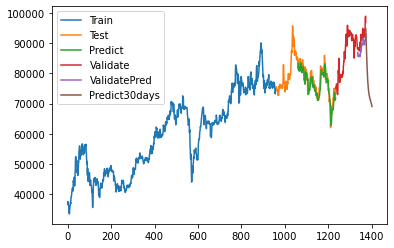

In [19]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()